In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

Joining season stats together into one table

In [29]:
df_2122 = pd.read_csv("21-22Reg.csv", sep=";", encoding='latin1')
df_2122["SZN"] = "21-22"

df_2223 = pd.read_csv("22-23Reg.csv", sep=";", encoding='latin1')
df_2223["SZN"] = "22-23"

df_2324 = pd.read_csv("23-24Reg.csv", sep=";", encoding='latin1')
df_2324["SZN"] = "23-24"

df_all = pd.concat([df_2122, df_2223, df_2324], ignore_index=True)

df_all.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SZN
2221,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3,23-24
2222,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7,23-24
2223,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6,23-24
2224,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8,23-24
2225,572,Ivica Zubac,C,26,LAC,68,68,26.4,5.0,7.6,...,2.9,6.3,9.2,1.4,0.3,1.2,1.2,2.6,11.7,23-24


Creating a histogram of points scored in the 2021-22 season

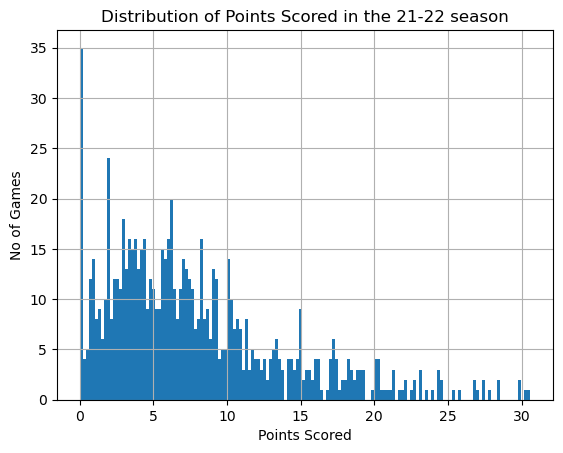

In [30]:
szn2122_stats = df_all.loc[df_all["SZN"] == "21-22"]
szn2122_stats["PTS"].hist(bins=150)
plt.xlabel("Points Scored")
plt.ylabel("No of Games")
plt.title("Distribution of Points Scored in the 21-22 season")

plt.show()

Calculating the rolling average of Anthony Edwards points over 3 seasons

In [31]:
ant_stats = df_all.loc[df_all["Player"] == "Anthony Edwards"].copy()
ant_stats["PTS_RollingAvg"] = ant_stats["PTS"].rolling(window=3).mean()
print(ant_stats[["PTS", "PTS_RollingAvg"]])

       PTS  PTS_RollingAvg
200   21.3             NaN
991   24.6             NaN
1674  25.9       23.933333


Plotting a bar chart of total points scored by each team in the 2023-24 season

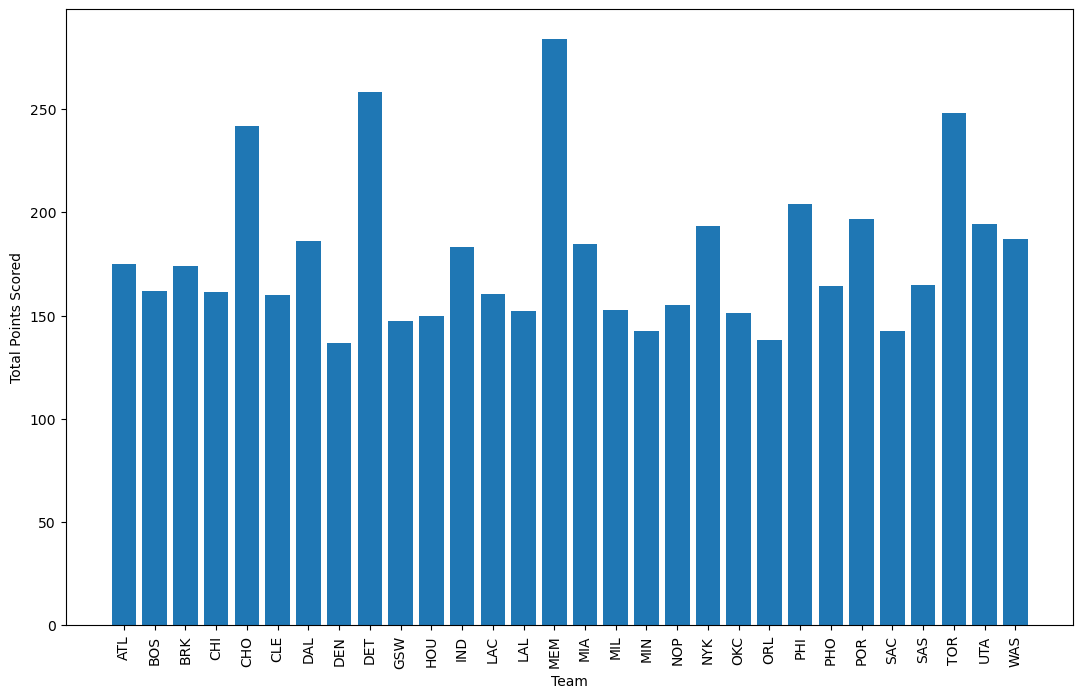

In [32]:
szn2324_stats = df_all.loc[(df_all["SZN"] == "23-24") & ~(df_all["Tm"] == "TOT")]
team_pts = szn2324_stats.groupby("Tm")["PTS"].sum()

plt.figure(figsize=(13,8))
plt.bar(team_pts.index, team_pts.values)
plt.xlabel("Team")
plt.ylabel("Total Points Scored")
plt.xticks(rotation=90)
plt.show()

Scatter Graph showing minutes played vs points scored by point guards in the 22-23 season 

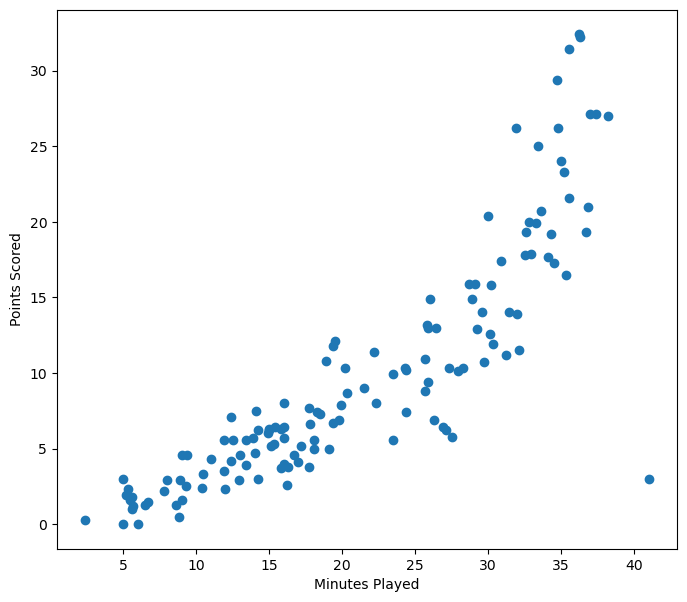

In [ ]:
pg_szn2223_stats = df_all.loc[(df_all["SZN"] == "22-23") & (df_all["Pos"] == "PG")]
plt.figure(figsize=(8,7))
plt.scatter(pg_szn2223_stats["MP"], pg_szn2223_stats["PTS"])
plt.xlabel("Minutes Played")
plt.ylabel("Points Scored")
plt.show()

Using Linear Regression to predict the number of points scored by Point Guards based on minutes played from 2021-2024.

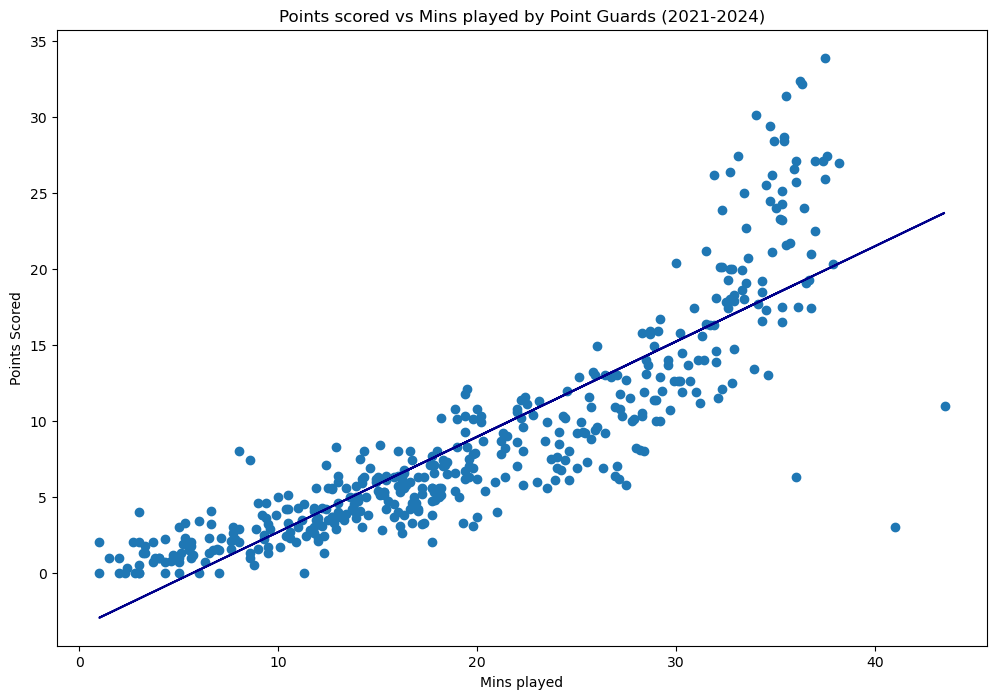

In [48]:
pg_stats = df_all.loc[df_all["Pos"] == "PG"]
pg_points = pg_stats["PTS"]
pg_mins = pg_stats["MP"]

slope, intercept, r, p, std_err = stats.linregress(pg_mins, pg_points)
def linearModel(x):
    return slope * x + intercept #y = mx + b

model = list(map(linearModel, pg_mins))
plt.figure(figsize=(12,8))
plt.scatter(pg_mins, pg_points)
plt.plot(pg_mins, model, color="darkblue")
plt.xlabel("Mins played")
plt.ylabel("Points Scored")
plt.title("Points scored vs Mins played by Point Guards (2021-2024)")
plt.show()